In [2]:
from slam.hamiltonian import DeltaConversionGainHamiltonian
import numpy as np

# args = gphi_ab, gphi_ac, gphi_bc, g_ab, g_ac, g_bc, cphi_ab, cphi_ac, cphi_bc, c_ab, c_ac, c_bc

# 12 parameters to hamitlonain

# 10 constraints

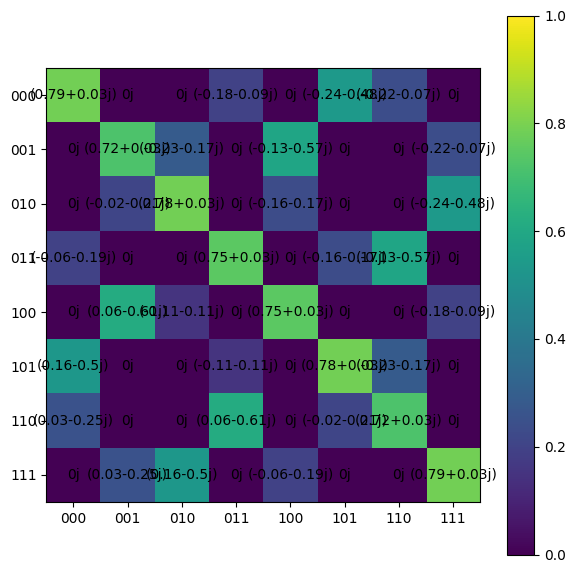

In [3]:
# instantiate hamiltonian
ham = DeltaConversionGainHamiltonian()

# ham.construct_U() with random variables, real valued
args = np.random.rand(12)
U = ham.construct_U(*args)

from slam.utils.visualize import plotMatrix

plotMatrix(U);

In [4]:
# optimize the parameters
from slam.basis import HamiltonianTemplate

ht = HamiltonianTemplate(h=DeltaConversionGainHamiltonian())
ht.parameter_guess()
ht.n_qubits = 3

# unitary cost function
from slam.cost_function import SquareCost

cost = SquareCost()

# define target as a custom 8x8 matrix
target = np.array(
    [
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
    ]
)


from slam.optimizer import TemplateOptimizer

to = TemplateOptimizer(ht, objective=cost, override_fail=1)
ret = to.approximate_target_U(target)

ret_u = ham.construct_U(*ret.Xk)
plotMatrix(ret_u);

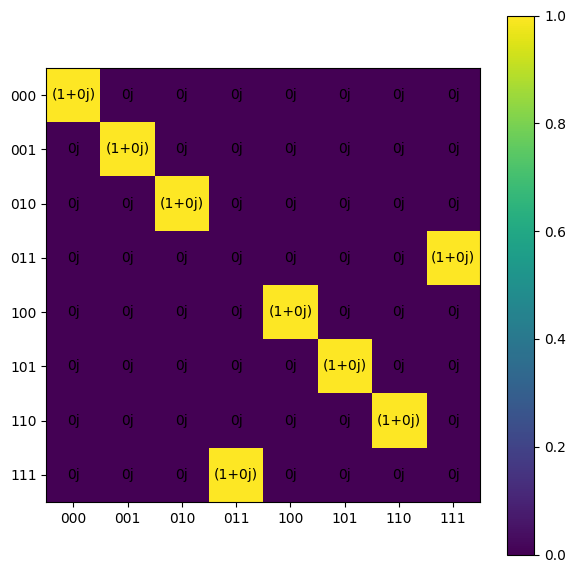

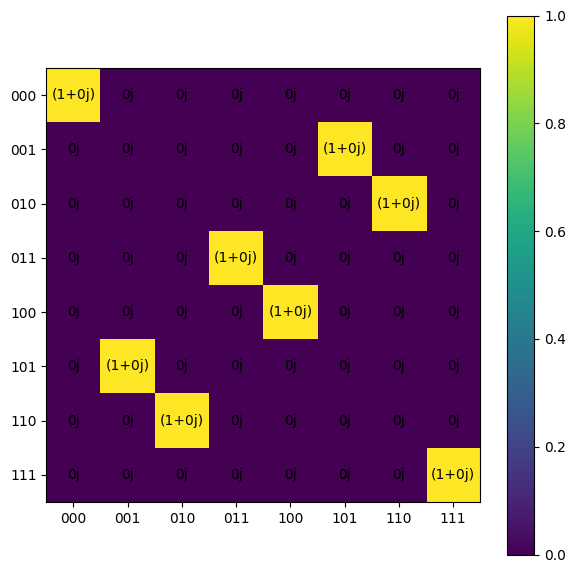

In [18]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator

qc = QuantumCircuit(3)
qc.ccx(0, 1, 2)
plotMatrix(Operator(qc).data)

qc = QuantumCircuit(3)
qc.cx(0, 2)
qc.cx(1, 2)
plotMatrix(Operator(qc).data);

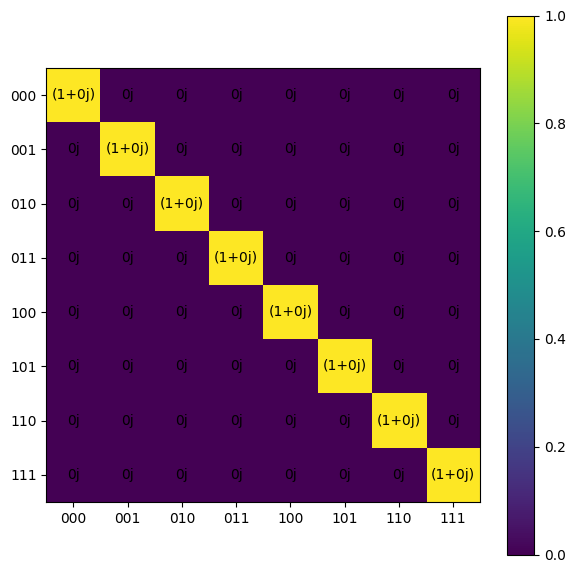

In [5]:
# gphi_ab, gphi_ac, gphi_bc, g_ab, g_ac, g_bc, cphi_ab, cphi_ac, cphi_bc, c_ab, c_ac, c_bc
# construct a data class with the parameters
from dataclasses import dataclass


@dataclass
class Params:
    gphi_ab: float
    gphi_ac: float
    gphi_bc: float
    g_ab: float
    g_ac: float
    g_bc: float
    cphi_ab: float
    cphi_ac: float
    cphi_bc: float
    c_ab: float
    c_ac: float
    c_bc: float

    # define a get function to return the parameters as a tuple
    def get(self):
        return (
            self.gphi_ab,
            self.gphi_ac,
            self.gphi_bc,
            self.g_ab,
            self.g_ac,
            self.g_bc,
            self.cphi_ab,
            self.cphi_ac,
            self.cphi_bc,
            self.c_ab,
            self.c_ac,
            self.c_bc,
        )


# define a set all phi terms to 0
a = 2 * np.pi / np.sqrt(3)
p = Params(a, a, a, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# construct the unitary
U = ham.construct_U(*p.get())
plotMatrix(U);

In [2]:
! pip install python-constraint

In [3]:
from constraint import *

In [ ]:
# # set up a constraint solver for the hamiltonian
# import constraint

# # set up the symbols
# gphi_ab = 'gphi_ab'
# gphi_ac = 'gphi_ac'
# gphi_bc = 'gphi_bc'
# g_ab = 'g_ab'
# g_ac = 'g_ac'
# g_bc = 'g_bc'
# cphi_ab = 'cphi_ab'
# cphi_ac = 'cphi_ac'
# cphi_bc = 'cphi_bc'
# c_ab = 'c_ab'
# c_ac = 'c_ac'
# c_bc = 'c_bc'

# args = [gphi_ab, gphi_ac, gphi_bc, g_ab, g_ac, g_bc, cphi_ab, cphi_ac, cphi_bc, c_ab, c_ac, c_bc]

# # put the symbols into Hamiltonian to build the U
# U = DeltaConversionGainHamiltonian().construct_U(*args)

# # set up the constraints on U
# # 10 total constraints
# # U is a 4x4 matrix
# prob = constraint.Problem()

# # U[0,0] = 1
# # U[3,3] = 1
# prob.addConstraint(lambda x: x == 1, [U[0,0]])
# prob.addConstraint(lambda x: x == 1, [U[3,3]])

# # elements between U[0:2, 0:3] are all zero
# # U[0,1] = 0
# # U[0,2] = 0
# # U[1,1] = 0
# # U[1,2] = 0
# # U[2,1] = 0
# # U[2,2] = 0
# # U[3,1] = 0
# # U[3,2] = 0
# prob.addConstraint(lambda x: x == 0, [U[0,1]])
# prob.addConstraint(lambda x: x == 0, [U[0,2]])
# prob.addConstraint(lambda x: x == 0, [U[1,1]])
# prob.addConstraint(lambda x: x == 0, [U[1,2]])
# prob.addConstraint(lambda x: x == 0, [U[2,1]])
# prob.addConstraint(lambda x: x == 0, [U[2,2]])
# prob.addConstraint(lambda x: x == 0, [U[3,1]])
# prob.addConstraint(lambda x: x == 0, [U[3,2]])

# # now solve
# prob.getSolutions()

TypeError: construct_U() takes 12 positional arguments but 13 were given